#  <center> Problem Set 2 (Perovskites) <center>
<center> Spring 2022 <center>
<center> 3.C01/3.C51, 10.C01/10.C51, 20.C01/20.C51 <center>
<center> Due: March 3, 2022 at 10pm <center>

<b>Name:</b>

<b>Kerberos ID:</b>

In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib
import torch

matplotlib.rcParams.update({'font.size': 15})
matplotlib.rc('lines', linewidth=3, color='g')
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams['axes.linewidth'] = 2.0
matplotlib.rcParams["xtick.major.size"] = 6
matplotlib.rcParams["ytick.major.size"] = 6
matplotlib.rcParams["ytick.major.width"] = 2
matplotlib.rcParams["xtick.major.width"] = 2
matplotlib.rcParams['text.usetex'] = False

### Download required data 

In [ ]:
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/main/psets/ps2-perov/data/mendeleev.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/main/psets/ps2-perov/data/perov_train.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/main/psets/ps2-perov/data/perov_val.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/main/psets/ps2-perov/data/perov_alloy.csv
! wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/main/psets/ps2-perov/data/elements.npy

## <center>Problem 1: Modeling Unalloyed Perovskites</center>

### 1.1 (5 points) Encoding chemical elements into feature vectors

In [ ]:
########### Code #############

perov = pd.read_csv("perov_train.csv") # read data 
all_elements = np.load('./elements.npy', allow_pickle=True) # Read all elements 

# Your code to featurize chemical elements 


########### Code #############

### 1.2 (5 points) Modeling with ridge regression

Ridge Regression training R^2 score: 1.00
Ridge Regression testing R^2 score: 1.00


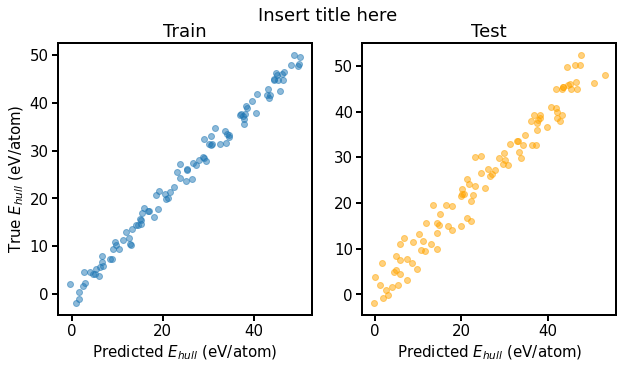

In [4]:
########### Code #############



# Generate random data (replace this with your own code)
n_samples = 100
train_prediction =  np.linspace(0, 50, n_samples) + np.random.randn(n_samples)
train_truth =  np.linspace(0, 50, n_samples) + np.random.randn(n_samples)

test_prediction = np.linspace(0, 50, n_samples) + 2 * np.random.randn(n_samples)
test_truth = np.linspace(0, 50, n_samples) + 2 * np.random.randn(n_samples)

# Code snippet to generate scatter plot 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].scatter(train_prediction, train_truth, label='Train', alpha=0.5)
ax[1].scatter(test_prediction, test_truth, label='Test', alpha=0.5, c='orange')

ax[0].set_ylabel("True $E_{hull}$ (eV/atom)")
ax[0].set_xlabel("Predicted $E_{hull}$ (eV/atom)")
ax[1].set_xlabel("Predicted $E_{hull}$ (eV/atom)")
ax[0].set_title('Train')
ax[1].set_title('Test')
fig.suptitle('Insert title here')

print("Ridge Regression training R^2 score: {:.2f}".format(1.0))
print("Ridge Regression testing R^2 score: {:.2f}".format(1.0))

########### Code #############

### 1.3 (10 points) Modeling with a multi-layer perceptron

In [ ]:
########### Code #############


print("MLP Regression training R^2 score: {:.2f}".format(1.0))
print("MLP Regression testing R^2 score: {:.2f}".format(1.0))

########### Code #############

Calculate the total of number of parameters in your MLP model. What does the input hidden_layers_sizes = (256, 256, 256) mean? 

In [ ]:
########## Answer ############



########## Answer ############

### 1.4 (3 points) Chemical transferability of one-hot representations

In [ ]:
########### Code #############

# Load the validation dataset which contains elements not seen in the training data
perov_val = pd.read_csv("perov_val.csv") 


print("MLP validation R^2 score: {:.2f}".format(1.0))
print("Ridge validation R^2 score: {:.2f}".format(1.0))
########### Code #############

Comment on your validation results and briefly explain.

In [ ]:
########## Answer ############



########## Answer ############

### 1.5 (5 points) Featurize perovskites with physical descriptors

In [ ]:
########### Code #############

elements_pd = pd.read_csv("mendeleev.csv")
elements_pd = elements_pd.set_index('symbol')


print("Training R^2 score: {:.2f}".format(1.0) )
print("Testing R^2 score: {:.2f}".format(1.0) )


########### Code #############

### 1.6 (5 points) Chemical transferability of physical descriptors 

In [ ]:
########### Code #############

# For the validation set, encode perov features with atomic descriptor 

print("Validation R^2 score: {:.2f}".format(1.0))

########### Code #############

Briefly comment on your validation performance and explain why.

In [ ]:
########## Answer ############



########## Answer ############

## <center>Problem 2: Modeling Alloyed (Hybrid) Perovskites</center>

### 2.1 (5 points) Encoding Compositional Information

In [ ]:
########### Code #############

# load data 
cry = pd.read_csv("perov_alloy.csv")

import json
def str2dict(dicstr):
    return json.loads(json.loads(dicstr))

cry["A"] = cry['A'].apply(str2dict)
cry["B"] = cry['B'].apply(str2dict)

print("MLP training R^2 score: {:.2f}".format(1.0))
print("MLP testing R^2 score: {:.2f}".format(1.0))

########### Code #############

### 2.2 (15 points) Optimize neural network architectures with HyperOpt

In [ ]:
########### Code #############

from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials
from sklearn.model_selection import cross_val_score


def hyperoptoutput2param(best):
    
    '''Change hyperopt output to dictionary with values '''
    
    for key in best.keys():
        if key in hyper_dict.keys():
            best[key] = hyper_dict[key][ best[key] ] 
            
    return best

# Define a dictionary for each parameter range 

hyper_dict = {
    "depth": [1, 2, 3],
    "width": [64, 128, 192, 256],
    "optimizer": ['sgd', 'adam'],
    "activation": ['relu', 'tanh'],
    "alpha":[0.08, 0.16, 0.32, 0.64]
}

parameter_space =  { "depth": hp.choice("depth", hyper_dict['depth']),
                    "width": hp.choice("width", hyper_dict['width']),
                    "optimizer": hp.choice("optimizer", hyper_dict['optimizer']), 
                    "activation": hp.choice("activation", hyper_dict['activation']), 
                    "alpha": hp.choice("alpha", hyper_dict['alpha'])
                    }


# Evaluation function 
# args should be a dict, with keys for width, depth, optimizer, activation, and alpha
def model_eval(args):

    '''Take suggested arguments and perform model evaluation'''
    
    # generate tuple input for hidden_layer_sizes 
    hidden_layers = tuple( [args['width']] * args['depth'] )

    # your code here to train MLPRegressors and to run CV score on the training data 

    cv_score = 1.0
    # return the negative of the CV score to ensure we maximize R^2 by minimizing the loss
    return -cv_score


print("Start trials") 

trials = Trials()
best = fmin(model_eval, parameter_space, algo=tpe.suggest, max_evals=40, trials=trials) # this will take a while to run 
best = hyperoptoutput2param(best)

print("Best parameter set: {}".format(best))
print("Best loss from CV {:.2f}".format(-trials.best_trial['result']['loss']))

########### Code #############

Train a MLP with the hyperparameters obtained.

In [ ]:
########### Code #############



########### Code #############

Report your parameter set. Have your predictions improved? 

In [ ]:
########## Answer ############



########## Answer ############

### 2.3 (5 points) Applying MLPs to classifying electronic properties of alloyed perovskites

In [ ]:
########### Code #############



########### Code #############

## <center> Problem 3: Accelerating Neural Networks with GPUs </center>

### 3.1 (2 points) Request a GPU on Google Colab

Run this cell as-is, with no modifications, to show that you successfully requested a GPU.

In [ ]:
# Check if your GPU is requested successfully or not 
assert torch.cuda.device_count() != 0

### 3.2 (10 points) Build Datasets and DataLoaders in PyTorch

Generate a validation set.

In [ ]:
########### Code #############



########### Code #############

A PerovskiteDataset class for you to construct your dataloaders.

In [ ]:
# Generate dataset 
class PerovskiteDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.Tensor(np.array(X))  # store X as a pytorch Tensor
        self.y = torch.Tensor(np.array(y))  # store y as a pytorch Tensor
        self.len=len(self.X)                # number of samples in the data 

    def __getitem__(self, index):
        return self.X[index], self.y[index] # get the appropriate item

    def __len__(self):
        return self.len

Fill in the skeleton code to construct your Datasets and DataLoaders.

In [ ]:
########### Code #############

train_data = PerovskiteDataset(# fill in arguments
val_data = PerovskiteDataset(# fill in arguments
test_data = PerovskiteDataset(# fill in arguments

batch_size = # fill in batch size
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=# fill in shuffle argument
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=# fill in shuffle argument
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=# fill in shuffle argument


########### Code #############

Run this cell to check that your DataLoaders work as expected.

In [ ]:
########### Code #############

for loader in [train_dataloader, val_dataloader, test_dataloader]:
    for index, batch in enumerate(loader): 
        # Your batch returns a X, y stacked in a batch 
        X_batch, y_batch = batch[0], batch[1]
        if index == 0:
            print(X_batch.shape, y_batch.shape)
        
########### Code #############

### 3.3 (15 points) Define the MLP in PyTorch

Look at the following code snippet to understand how the linear layer works in PyTorch. Take careful note of the dimensions of the input and output.

In [3]:
linear = torch.nn.Linear(2, 3)

input_tensor = torch.ones((4, 2))
output_tensor = linear(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) tensor([[-0.2188, -0.2305,  0.8828],
        [-0.2188, -0.2305,  0.8828],
        [-0.2188, -0.2305,  0.8828],
        [-0.2188, -0.2305,  0.8828]], grad_fn=<AddmmBackward>) torch.Size([4, 2]) torch.Size([4, 3])


Look at the following code snippet to understand how the ReLU layer works in PyTorch (the Tanh layer is similar). Take careful note of the dimensions of the input and output.

In [4]:
relu = torch.nn.ReLU()

input_tensor = torch.ones((4, 2))
output_tensor = relu(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) torch.Size([4, 2]) torch.Size([4, 2])


Look at the following code snippet to understand how to stack layers with the Sequential module.

In [6]:
layer1 = torch.nn.Linear(2, 3)
layer2 = torch.nn.Linear(3, 4)

sequential = torch.nn.Sequential(layer1, layer2)

input_tensor = torch.ones((5, 2))
output_tensor = sequential(input_tensor)

print(input_tensor, output_tensor, input_tensor.shape, output_tensor.shape)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]) tensor([[-0.1942, -0.2699, -0.1599, -0.3514],
        [-0.1942, -0.2699, -0.1599, -0.3514],
        [-0.1942, -0.2699, -0.1599, -0.3514],
        [-0.1942, -0.2699, -0.1599, -0.3514],
        [-0.1942, -0.2699, -0.1599, -0.3514]], grad_fn=<AddmmBackward>) torch.Size([5, 2]) torch.Size([5, 4])


Build your MLP within the following torch.nn.Module object. Remember to use your hyperparameters from part 2.2.

In [ ]:
########### Code #############

class PerovskiteMLP(torch.nn.Module):
    def __init__(self):
        # You can modify this method to pass hyperparameters above, but this is not necessary
        # since we already have fixed hyperparameters
        super().__init__()
        
        # Implement your code here
        
        self.model = # fill in model here
        
    def forward(self, x):
        x = self.model(x)
        
        return x

########### Code #############

### 3.4 (10 points) Implement functions for training and testing

Define your model, device, and optimizer.

In [ ]:
########### Code #############

# device to train on
device = 'cuda:0'
# define your model
model = PerovskiteMLP().to(device)

# define your optimizer
optimizer = # fill in optimizer here

########### Code #############

Implement your training and validation loops here.

In [ ]:
########### Code #############

def train(model, dataloader, optimizer, device):
    
    '''
    A function train on the entire dataset for one epoch .
    
    Args: 
        model (torch.nn.Module): your model from before 
        dataloader (torch.utils.data.DataLoader): DataLoader object for the train data
        optimizer (torch.optim.Optimizer(()): optimizer object to interface gradient calculation and optimization 
        device (str): Your device (usually 'cuda:0' for your GPU)
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''

    epoch_loss = []
    model.train() # Set model to training mode 
    
    for batch in dataloader:    
        X, y = batch
        X = X.to(device)
        y = y.to(device)
        
        # train your model on each batch here 
        y_pred = model(X)
        
        loss = # fill in loss here
        epoch_loss.append(loss.item())
        
        # run backpropagation given the loss you defined
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return np.array(epoch_loss).mean()


def validate(model, dataloader, device):
    
    '''
    A function validate on the validation dataset for one epoch .
    
    Args: 
        model (torch.nn.Module): your model for before 
        dataloader (torch.utils.data.DataLoader): DataLoader object for the validation data
        device (str): Your device (usually 'cuda:0' for your GPU)
        
    Returns: 
        float: loss averaged over all the batches 
    
    '''
    
    val_loss = []
    model.eval() # Set model to evaluation mode 
    with torch.no_grad():    
        for batch in dataloader:
            X, y = batch
            X = X.to(device)
            y = y.to(device)
            
            # validate your model on each batch here 
            y_pred = model(X)

            loss = # fill in loss here
            val_loss.append(loss.item())
            
    return np.array(val_loss).mean()

########### Code #############

Train and validate your model.

In [ ]:
print("epoch", "train loss", "validation loss")

val_loss_curve = []
train_loss_curve = []

for epoch in range(400):
    
    # Compute train your model on training data
    epoch_loss = train(model, train_dataloader, optimizer,  device=device)
    
    # Validate your on validation data 
    val_loss = validate(model, val_dataloader, device=device) 
    
    # Record train and loss performance 
    train_loss_curve.append(epoch_loss)
    val_loss_curve.append(val_loss)
    
    print(epoch, epoch_loss, val_loss)

Plot your train and validation loss curves.

In [ ]:
plt.plot(val_loss_curve)
plt.plot(train_loss_curve)

Compute your R^2 on the test set.

In [ ]:
########### Code #############

from sklearn.metrics import r2_score

# code to compute r^2 goes here
model.eval()
########### Code #############